In [1]:
import pandas as pd
import sys

# --- Define our file names ---
# This makes it easy to change them later if you want
INPUT_FILE = 'Untitled spreadsheet - Test_Data.csv'
OUTPUT_FILE = 'cleaned_insurance_data.csv'

# --- [STEP 1] Load the dataset ---
print(f"Loading data from '{INPUT_FILE}'...")

try:
    # 'header=0' tells pandas to use the first row (row index 0) as the column names
    df = pd.read_csv(INPUT_FILE, header=0)
    print("Data loaded successfully!")

except FileNotFoundError:
    print(f"--- ERROR ---")
    print(f"Could not find the file '{INPUT_FILE}'.")
    print("Please make sure your CSV file is in the same folder as this Python script.")
    sys.exit() # Stop the script if the file isn't found
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    sys.exit()

# --- [STEP 2] Check for missing data ---
# It's always good practice to check!
print("\nChecking for any missing values (NaNs)...")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("Great! No missing values found.")
# (If there were missing values, you would add code here to fill or drop them)


# --- [STEP 3] Clean data types (optional, but good) ---
# 'age' and 'bmi' have many decimals. Let's make them cleaner.

# 'age' should be a whole number (integer)
df['age'] = df['age'].astype(int)

# 'bmi' can be rounded to 2 decimal places
df['bmi'] = df['bmi'].round(2)

print("\nCleaned 'age' and 'bmi' columns (rounded decimals).")


# --- [STEP 4] Convert text to numbers for analysis ---
# This is often called "One-Hot Encoding".
# We need to change 'sex', 'smoker', and 'region' into 0s and 1s.

print("Converting text columns ('sex', 'smoker', 'region') into numbers...")

# pd.get_dummies() does this for us automatically.
# 'drop_first=True' is standard for data analysis to avoid redundant columns.
df_cleaned = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

print("Text columns successfully converted!")


# --- [STEP 5] Save the final, clean file ---
try:
    # 'index=False' stops pandas from saving the row numbers (0, 1, 2...) as a new column
    df_cleaned.to_csv(OUTPUT_FILE, index=False)

    print(f"\n--- ALL DONE! ---")
    print(f"Your clean data has been saved to '{OUTPUT_FILE}'")

    # Let's look at a preview of the final data
    print("\nHere's a preview of your clean data:")
    print(df_cleaned.head())

except Exception as e:
    print(f"\n--- ERROR ---")
    print(f"Could not save the file. Do you have permission to write here?")
    print(f"Details: {e}")


Loading data from 'Untitled spreadsheet - Test_Data.csv'...
Data loaded successfully!

Checking for any missing values (NaNs)...
Series([], dtype: int64)
Great! No missing values found.

Cleaned 'age' and 'bmi' columns (rounded decimals).
Converting text columns ('sex', 'smoker', 'region') into numbers...
Text columns successfully converted!

--- ALL DONE! ---
Your clean data has been saved to 'cleaned_insurance_data.csv'

Here's a preview of your clean data:
   age    bmi  children  sex_male  smoker_yes  region_northwest  \
0   40  29.90         2      True       False             False   
1   47  32.30         1      True       False             False   
2   54  28.88         2     False       False             False   
3   37  30.57         3      True       False             False   
4   59  33.13         4      True        True             False   

   region_southeast  region_southwest  
0             False              True  
1             False              True  
2            

Successfully loaded 'cleaned_insurance_data.csv'. Starting analysis...

--- Descriptive Statistics (for numerical columns) ---
          age     bmi  children
count  492.00  492.00    492.00
mean    38.56   30.68      2.51
std     12.42    5.43      1.68
min     18.00   16.82      0.00
25%     28.00   26.99      1.00
50%     39.00   29.98      2.00
75%     49.00   33.78      4.00
max     64.00   50.38      5.00

--- Value Counts (for categorical columns) ---

Sex breakdown:
sex
male      286
female    206
Name: count, dtype: int64

Smoker breakdown:
smoker
no     430
yes     62
Name: count, dtype: int64

Region breakdown:
region
northeast    146
southeast    135
southwest    106
northwest    105
Name: count, dtype: int64

Creating and saving plots in 'analysis_plots' folder...
Saved: 1_age_bmi_distribution.png
Saved: 2_bmi_vs_smoker.png
Saved: 3_age_vs_bmi_scatterplot.png
Saved: 4_smokers_by_region.png
Saved: 5_bmi_by_region.png

--- Analysis Complete! ---
All plots are saved in the 'a

<Figure size 1000x600 with 0 Axes>

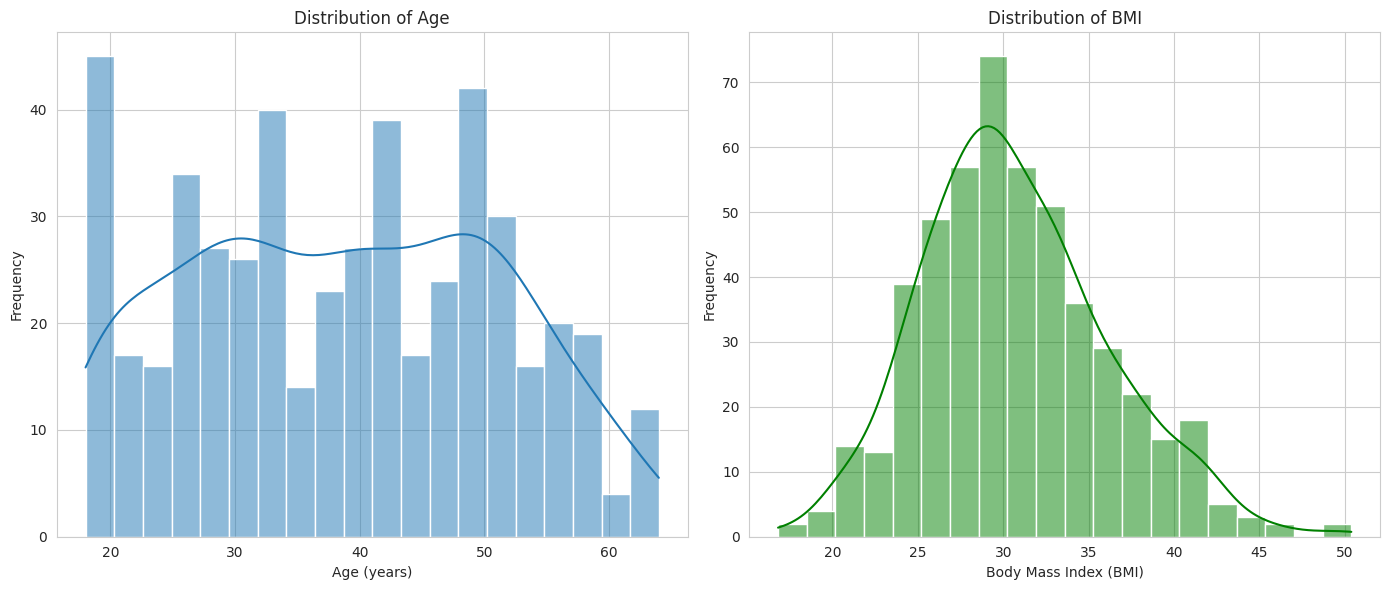

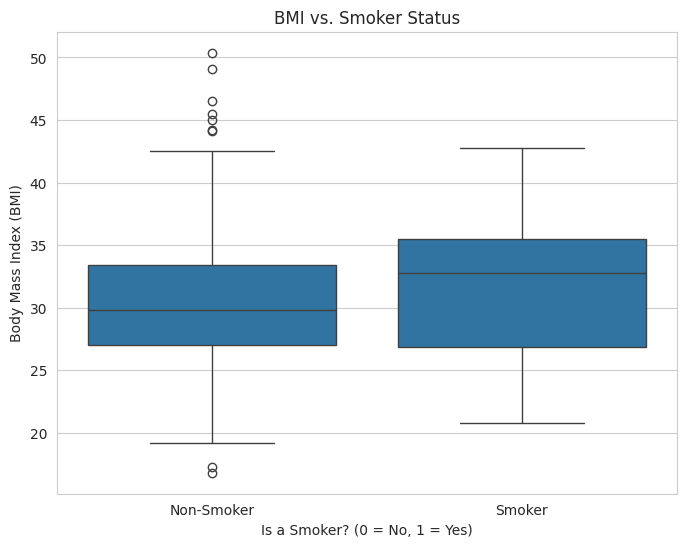

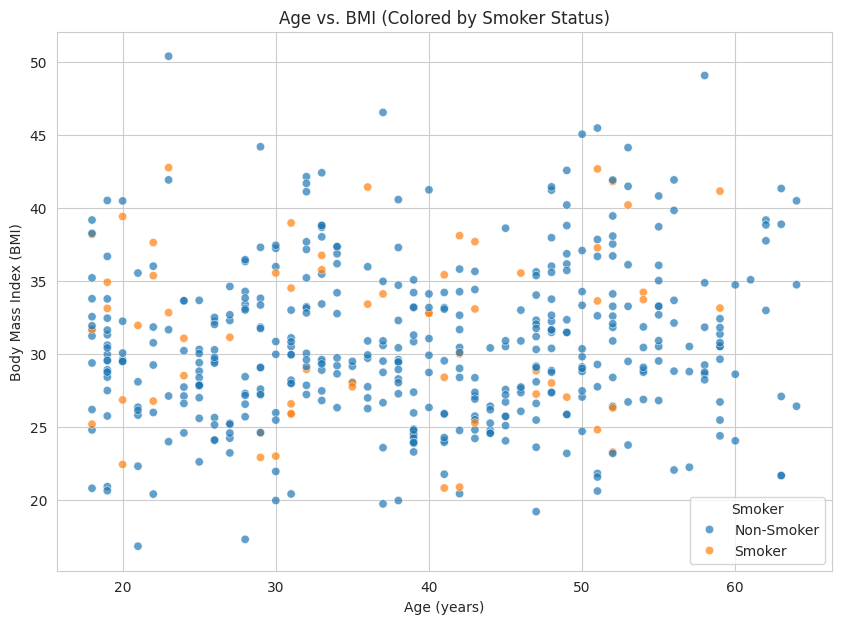

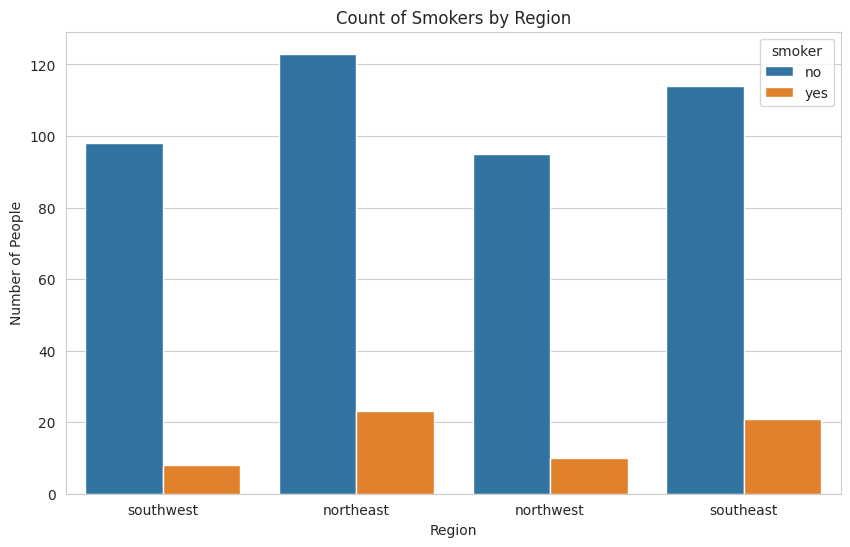

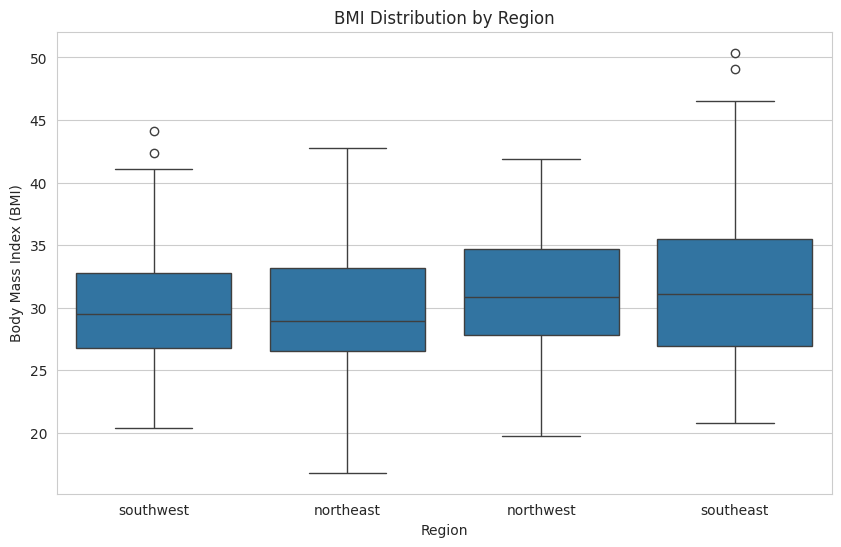

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# --- [STEP 1] Load the CLEAN data ---

# We use the output file from our previous cleaning script
CLEAN_DATA_FILE = 'cleaned_insurance_data.csv'

try:
    df = pd.read_csv(CLEAN_DATA_FILE)
except FileNotFoundError:
    print(f"--- ERROR ---")
    print(f"Could not find the file '{CLEAN_DATA_FILE}'.")
    print("Please run the 'clean_insurance_data.py' script first to create this file.")
    sys.exit()
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    sys.exit()

print(f"Successfully loaded '{CLEAN_DATA_FILE}'. Starting analysis...")


# --- [STEP 2] Get Descriptive Statistics ---

print("\n--- Descriptive Statistics (for numerical columns) ---")
# .describe() gives you the count, mean, min, max, etc.
# We round to 2 decimal places to make it easier to read
print(df[['age', 'bmi', 'children']].describe().round(2))


print("\n--- Value Counts (for categorical columns) ---")
# We need to load the *original* file again to see the text-based counts
# This is just for this one print statement
try:
    df_original = pd.read_csv('Untitled spreadsheet - Test_Data.csv', header=0)
    print("\nSex breakdown:")
    print(df_original['sex'].value_counts())

    print("\nSmoker breakdown:")
    print(df_original['smoker'].value_counts())

    print("\nRegion breakdown:")
    print(df_original['region'].value_counts())
except Exception:
    print("Could not load original file for counts, skipping.")


# --- [STEP 3] Create Visualizations (Plots) ---

# We will save all plots into a new folder
import os
if not os.path.exists('analysis_plots'):
    os.makedirs('analysis_plots')

print("\nCreating and saving plots in 'analysis_plots' folder...")

# Set a nice style for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# --- Plot 1: Distribution of Age and BMI ---
# Histograms show us the "shape" of the data
plt.figure(figsize=(14, 6))

# First subplot
plt.subplot(1, 2, 1) # (1 row, 2 columns, 1st plot)
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

# Second subplot
plt.subplot(1, 2, 2) # (1 row, 2 columns, 2nd plot)
sns.histplot(df['bmi'], kde=True, bins=20, color='green')
plt.title('Distribution of BMI')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Frequency')

plt.tight_layout() # Prevents plots from overlapping
plt.savefig('analysis_plots/1_age_bmi_distribution.png')
print("Saved: 1_age_bmi_distribution.png")


# --- Plot 2: BMI by Smoker Status ---
# A boxplot is excellent for comparing a number (BMI) across a category (Smoker)
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker_yes', y='bmi', data=df)
plt.title('BMI vs. Smoker Status')
plt.xlabel('Is a Smoker? (0 = No, 1 = Yes)')
plt.ylabel('Body Mass Index (BMI)')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker']) # Make labels user-friendly
plt.savefig('analysis_plots/2_bmi_vs_smoker.png')
print("Saved: 2_bmi_vs_smoker.png")


# --- Plot 3: Age vs. BMI (colored by Smoker) ---
# A scatter plot helps find relationships between two numbers (Age and BMI)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='age', y='bmi', hue='smoker_yes', data=df, alpha=0.7)
plt.title('Age vs. BMI (Colored by Smoker Status)')
plt.xlabel('Age (years)')
plt.ylabel('Body Mass Index (BMI)')
# Update legend for clarity
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Non-Smoker', 'Smoker'], title="Smoker")
plt.savefig('analysis_plots/3_age_vs_bmi_scatterplot.png')
print("Saved: 3_age_vs_bmi_scatterplot.png")


# --- Plot 4: Smoker count by Region ---
# We need the original dataframe for this to use the text labels
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='smoker', data=df_original)
plt.title('Count of Smokers by Region')
plt.xlabel('Region')
plt.ylabel('Number of People')
plt.savefig('analysis_plots/4_smokers_by_region.png')
print("Saved: 4_smokers_by_region.png")


# --- Plot 5: BMI by Region ---
# Another boxplot to compare BMI across different regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='bmi', data=df_original)
plt.title('BMI Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Body Mass Index (BMI)')
plt.savefig('analysis_plots/5_bmi_by_region.png')
print("Saved: 5_bmi_by_region.png")


print("\n--- Analysis Complete! ---")
print("All plots are saved in the 'analysis_plots' folder.")


# New Section